<a href="https://colab.research.google.com/github/anjali0709-debug/OIBSIP/blob/main/oasistask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [13]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df=df.drop(columns=["Id"])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [17]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

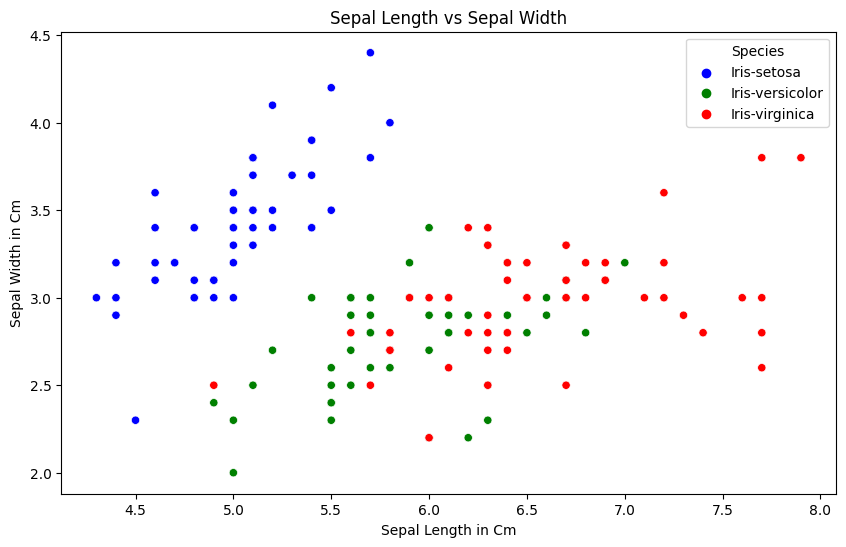

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Sepal Length in Cm')
plt.ylabel('Sepal Width in Cm')
plt.title('Sepal Length vs Sepal Width')
plt.show()


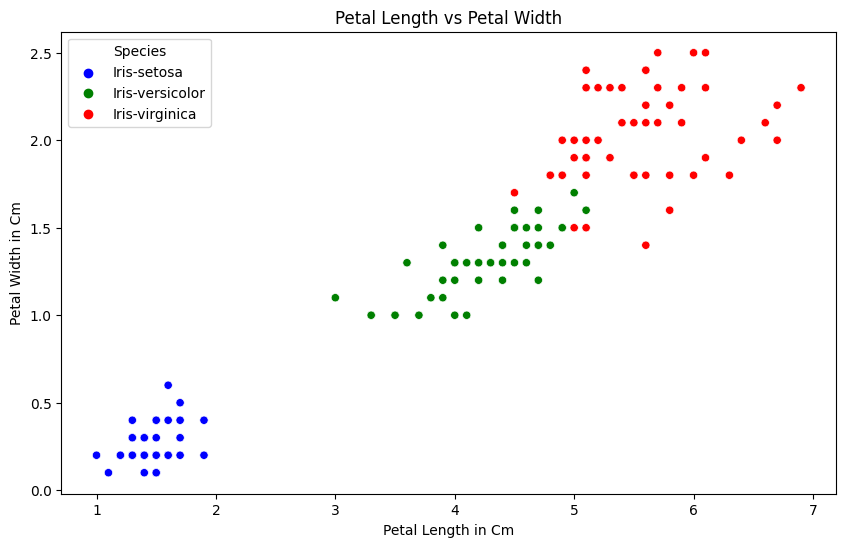

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', palette=['blue', 'green', 'red'])
plt.xlabel('Petal Length in Cm')
plt.ylabel('Petal Width in Cm')
plt.title('Petal Length vs Petal Width')
plt.show()


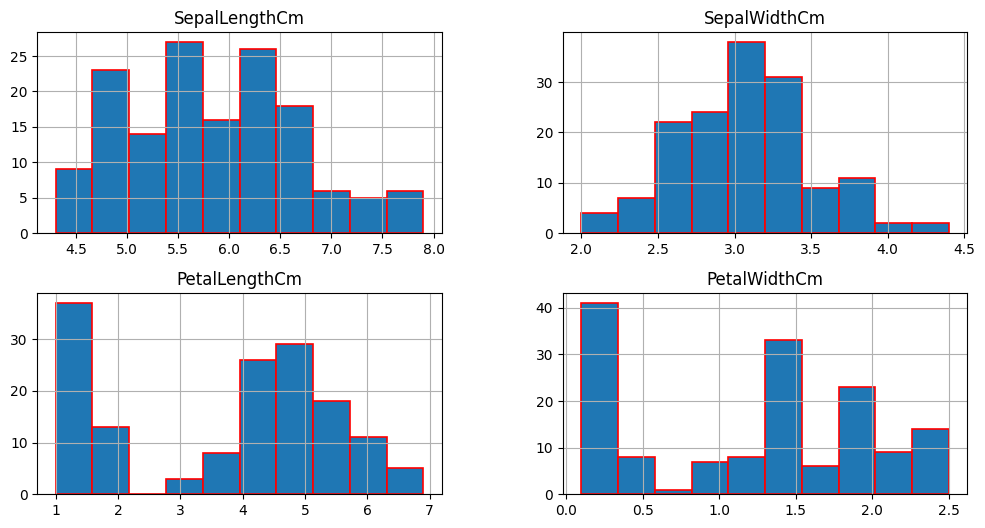

In [20]:
df.hist(edgecolor='red',linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

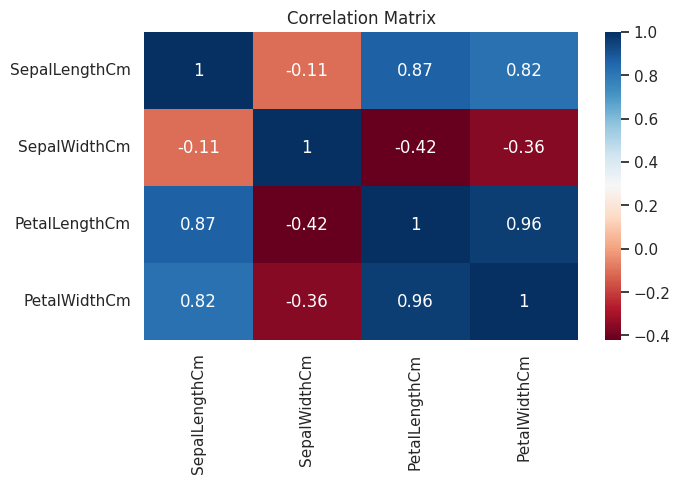

In [21]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")  # Set plot style

corr_matrix = df.corr(numeric_only=True)  # Compute the correlation matrix

sns.heatmap(corr_matrix, annot=True, cmap='RdBu')

plt.title("Correlation Matrix")
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["Species"])
y = df["Species"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [24]:
y_train.head()

118     Iris-virginica
18         Iris-setosa
4          Iris-setosa
45         Iris-setosa
59     Iris-versicolor
Name: Species, dtype: object

In [25]:
from sklearn.linear_model import LogisticRegression

modelA = LogisticRegression(max_iter=1000)  # Increase the number of iterations
modelA.fit(x_train,y_train)
print("Fitting completed")
logisticReg_accuracy = modelA.score(x_test,y_test)*100
print("Accuracy using Logistic Regression: ",logisticReg_accuracy)

Fitting completed
Accuracy using Logistic Regression:  97.77777777777777


In [26]:
from sklearn.neighbors import KNeighborsClassifier
modelB = KNeighborsClassifier(n_neighbors=3)
modelB.fit(x_train,y_train)
print("Fitting completed")

KNN_accuracy = modelB.score(x_test,y_test)*100
print("Accuracy using KNN model: ",KNN_accuracy)

Fitting completed
Accuracy using KNN model:  97.77777777777777


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
modelC = DecisionTreeClassifier()
modelC.fit(x_train,y_train)
print("Fitting completed")
Decision_accuracy = modelC.score(x_test,y_test)*100
print("Accuracy using Decision tree model: ",Decision_accuracy)

Fitting completed
Accuracy using Decision tree model:  95.55555555555556


In [28]:
svm_classifier = SVC(kernel='linear', C=1.0)

svm_classifier.fit(x_train, y_train)
print("Training completed")
y_pred = svm_classifier.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)*100
print(f"Accuracy: {svm_accuracy:.2f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Training completed
Accuracy: 100.00
Confusion Matrix:
 [[14  0  0]
 [ 0 18  0]
 [ 0  0 13]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00        18
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



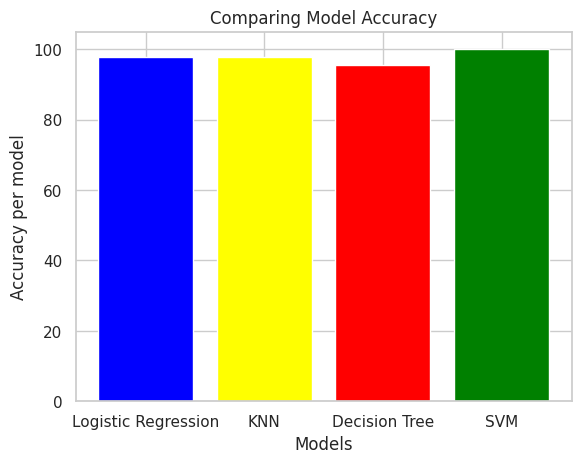

In [29]:
models = ['Logistic Regression', 'KNN', 'Decision Tree','SVM']
accuracies = [logisticReg_accuracy, KNN_accuracy, Decision_accuracy,svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'yellow', 'red','green'])
plt.xlabel("Models")
plt.ylabel("Accuracy per model")
plt.title("Comparing Model Accuracy")
plt.show()